# Linear Regression


* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Task 2: Read the USA_Housing.csv Dataset and check the head of the Data

In [ ]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Check for missing values in the dataset

In [4]:
USAhousing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Linear Regression have several assumptions, we will need to check each of those to make sure if Linear Regression is the right model for our dataset

#### Assumption 1: Linearity

The relationship between the independent variables and the dependent variable is linear.

####  Assumption 2: Homoscedasticity

The variance of residuals is constant across all levels of the independent variables.

#### Assumption 3: Normality of Residuals

Residuals of the model are normally distributed.

#### Assumption 4: No Multicollinearity

Independent variables are not highly correlated.

#### Assumption 5: Independence

Observations are independent of each other.

### Task 4: Check Assumption 1 of Linear Regression graphically.
(The relationship between the independent variables and the dependent variable is linear.)

In [5]:
X_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']
y_features = ['Price']

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


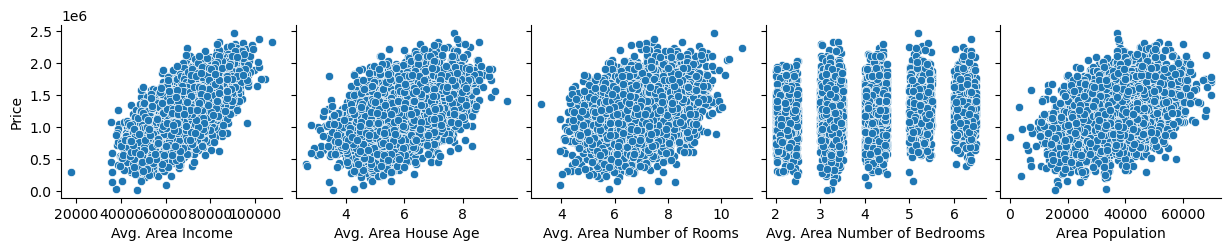

In [6]:
sns.pairplot(data=USAhousing,x_vars=X_features,y_vars=y_features)

### Create a Function to remove Outliers from the dataset using IQR method. 

I encourage you to fit the model without treating outliers

In [7]:
def remove_outliers(column):
    Q1 = USAhousing[column].quantile(0.25)
    Q3 = USAhousing[column].quantile(0.75)
    IQR = Q3-Q1
    outliers = (USAhousing[column]<(Q1-1.5*IQR))|(USAhousing[column]>(Q3+1.5*IQR))
    return USAhousing[~outliers]

### Run a for loop for all the X Features to remove the Outliers from the dataset

In [8]:
for col in X_features:
    USAhousing = remove_outliers(col)

### from sklearn.model_selection import train_test_split, from sklearn.preprocessing import StandardScaler, from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Define X and y

In [10]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

###  Split the dataset to training and test data. Keep random_state to 101

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Initialize the Scaler. Fit and Transform on X_train. Transform on X_test. 

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###  Initialize the Linear Regression Model and fit the training Data

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions on X_test

In [34]:
y_pred = model.predict(X_test)

### Calculate the residuals of the model

In [56]:
residuals =y_test-y_pred

### Let's check Assumption 2, Homoscedasticity.
(The variance of residuals is constant across all levels of the independent variables.)

**Task 14.1: Graphical way: Plot a Scatter of y_pred and residuals. If there is no pattern in scatter plot, we are good and the condition of Homoscedasticity is met.**

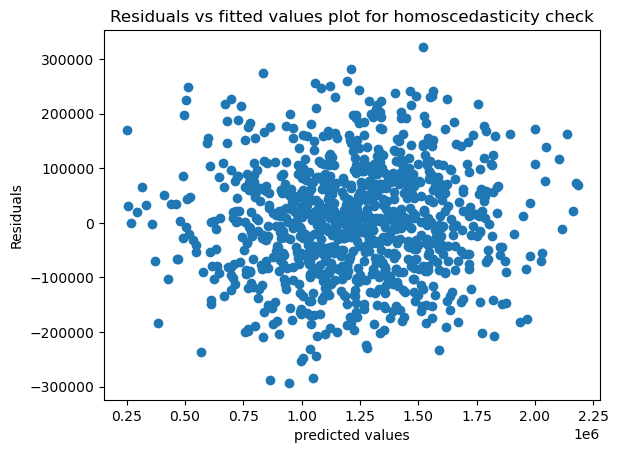

In [57]:
plt.scatter(x=y_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**No pattern is great as homoscedasticity is indicated**

**Task 14.2: Checking with the statistical test. We can use Goldfeld Quandt Test  to check for  homoscedasticity. For this test**


Null Hypothesis: Error terms are homoscedastic.

Alternative Hypothesis: Error terms are heteroscedastic.

Note: If p-value is less than 0.05, we reject the null Hypothesis that Error terms are homoscedastic. Else we don't reject the Null Hypothesis

In [68]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.9361207577936964), ('p-value', 0.7659818919531858)]

**Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject the null hypothesis that error terms are homoscedastic. Good.**

###  Check Assumption 3, Residuals should be normally distributed

**Task 15.1: Check this assumption by drawing a Histogram of residuals**

C:\Users\ashis\AppData\Local\Temp\ipykernel_14904\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)
C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


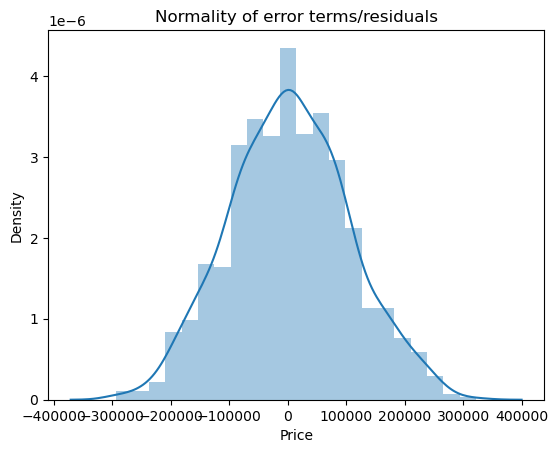

In [59]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**Task 15.2: Check the same assumption using Shapiro-Wilk Test**

Statistical Test: Shapiro-Wilk Test

Null Hypothesis (H0): Residuals are normally distributed.

Alternative Hypothesis (H1): Residuals are not normally distributed.

Interpretation: If the p-value is less than 0.05, reject the null hypothesis, indicating that residuals are not normally distributed.

In [60]:
from scipy.stats import shapiro
# Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

Shapiro-Wilk test statistic: 0.9982940554618835, p-value: 0.4479143023490906


###  Check the No Multicollinearity Assumption: Independent variables are not highly correlated. 

In [101]:
# VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            Feature        VIF
0  Avg. Area Income  11.397053
1   Area Population  11.397053


Statistical Test: Variance Inflation Factor (VIF)

Interpretation: VIF values > 10 indicate high multicollinearity that requires correction. Lower VIF values indicate less correlation among predictors.

This assumption likely doesn't meet as the data is a fake data. However, in real datasets, following remedies can be applied!


1. Remove highly correlated predictors.
2. Combine correlated variables through techniques like Principal Component Analysis (PCA).
3. Use ridge regression or LASSO regression which can handle multicollinearity.

###  Check the independence assumption using durbin watson test

In [64]:
from statsmodels.stats.stattools import durbin_watson

Interpretation: The Durbin-Watson statistic ranges from 0 to 4, where:

**2 indicates no autocorrelation.**

**>2 indicates negative autocorrelation.**

**<2 indicates positive autocorrelation.**

In [65]:
# Durbin-Watson Test
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 2.0011636856631636


###  Finally Let's Evaluate the model on Test Data

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Percentage Error** (MAPE) is the mean % of the absolute value of the errors compared to True values:

$$ \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [91]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'Mean Absolute Percentage Error: {round(mape*100)}'+'%')

Mean Absolute Error: 81853.33713962074
Mean Squared Error: 10507955692.616385
Root Mean Squared Error: 102508.32011410773
Mean Absolute Percentage Error: 7%
